<a href="https://colab.research.google.com/github/akshaykumar2972/POC2025/blob/main/Customer_Personality_Analysis_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_final = pd.read_csv("/content/Market Campaign Scaled Dataset for Clustering.csv").drop_duplicates()
df_final.head()

,Income,DaysSinceLastPurchase,AmountSpentOnWine,AmountSpentOnFruits,AmountSpentOnMeatProducts,AmountSpentOnFishProducts,AmountSpentOnSweetProducts,AmountSpentOnGoldProducts,PurchasesMadeWithDiscounts,PurchasesMadeViaWeb,...,Kidhome,Teenhome,IsCampaign1Accepted,IsCampaign2Accepted,IsCampaign3Accepted,IsCampaign4Accepted,IsCampaign5Accepted,IsLastCampaignAccepted,HasComplainedInLast2Months,IsSingle
0,0.288408,0.306856,0.983228,1.554170,1.679746,2.461068,1.475396,0.845669,0.348738,1.407639,...,0,0,0,0,0,0,0,1,0,1
1,-0.262476,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,-0.729742,-0.168700,-1.110921,...,1,1,0,0,0,0,0,0,0,1
2,0.917811,-0.798467,0.362159,0.572177,-0.177201,1.344595,-0.147262,-0.038098,-0.686137,1.407639,...,0,0,0,0,0,0,0,0,0,0
3,-1.182548,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,-0.748954,-0.168700,-0.751127,...,1,0,0,0,0,0,0,0,0,0
4,0.295648,1.550344,-0.389661,0.421101,-0.217088,0.154911,-0.001950,-0.556831,1.383614,0.328256,...,1,0,0,0,0,0,0,0,0,0


In [4]:
df_final.iloc[:,:12].head()

,Income,DaysSinceLastPurchase,AmountSpentOnWine,AmountSpentOnFruits,AmountSpentOnMeatProducts,AmountSpentOnFishProducts,AmountSpentOnSweetProducts,AmountSpentOnGoldProducts,PurchasesMadeWithDiscounts,PurchasesMadeViaWeb,PurchasesMadeViaCatalog,PurchasesMadeDirectly
0,0.288408,0.306856,0.983228,1.554170,1.679746,2.461068,1.475396,0.845669,0.348738,1.407639,2.509801,-0.552429
1,-0.262476,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,-0.729742,-0.168700,-1.110921,-0.568970,-1.167738
2,0.917811,-0.798467,0.362159,0.572177,-0.177201,1.344595,-0.147262,-0.038098,-0.686137,1.407639,-0.226884,1.293496
3,-1.182548,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,-0.748954,-0.168700,-0.751127,-0.911056,-0.552429
4,0.295648,1.550344,-0.389661,0.421101,-0.217088,0.154911,-0.001950,-0.556831,1.383614,0.328256,0.115201,0.062879


In [5]:
df_final.iloc[:,13:].head()

,Age,Kidhome,Teenhome,IsCampaign1Accepted,IsCampaign2Accepted,IsCampaign3Accepted,IsCampaign4Accepted,IsCampaign5Accepted,IsLastCampaignAccepted,HasComplainedInLast2Months,IsSingle
0,1.016868,0,0,0,0,0,0,0,1,0,1
1,1.273264,1,1,0,0,0,0,0,0,0,1
2,0.333146,0,0,0,0,0,0,0,0,0,0
3,-1.290693,1,0,0,0,0,0,0,0,0,0
4,-1.034298,1,0,0,0,0,0,0,0,0,0


In [6]:
X_scaled = df_final.copy()

In [9]:
pca = PCA()
pca.fit(X_scaled)

PCA()

In [35]:
pca.explained_variance_

array([5.82328582, 1.58289614, 1.0878947 , 1.00111067, 0.80094461,
       0.67545514, 0.62437366, 0.51910608, 0.45392744, 0.40079116,
       0.35720594, 0.31400641, 0.29952429])

In [36]:
pca.explained_variance_ratio_

array([0.38223269, 0.10389919, 0.07140795, 0.06571157, 0.05257293,
       0.04433597, 0.04098305, 0.03407343, 0.02979519, 0.0263074 ,
       0.02344652, 0.02061096, 0.01966037])

In [10]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)

[0.38223269 0.48613188 0.55753983 0.6232514  0.67582433 0.7201603
 0.76114336 0.79521678 0.82501197 0.85131937 0.87476589 0.89537685
 0.91503723 0.93239729 0.9485019  0.96328989 0.97511343 0.98443163
 0.98962487 0.99327554 0.99624685 0.99866644 0.99942052 1.        ]


Text(0.5, 1.0, 'Cumulative Explained Variance vs. Number of Components')

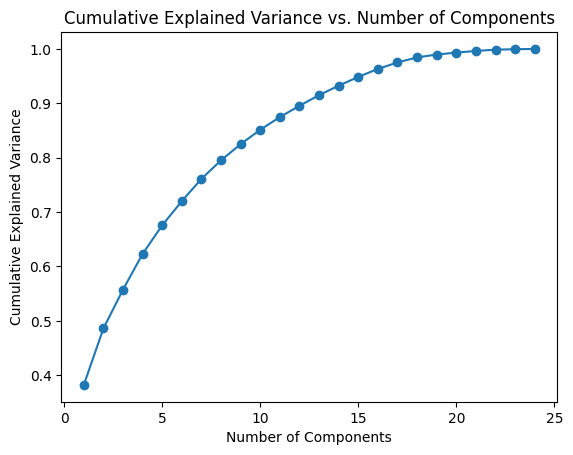

In [31]:
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')

In [12]:
len(cumulative_variance)

24

In [13]:
n_components = np.argmax(cumulative_variance >= 0.9) + 1
print(f"Number of components for 90% variance: {n_components}")

Number of components for 90% variance: 13


In [14]:
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [15]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

In [16]:
df_final['cluster'] = clusters

In [28]:
df_final.iloc[:,15:].head()

,Teenhome,IsCampaign1Accepted,IsCampaign2Accepted,IsCampaign3Accepted,IsCampaign4Accepted,IsCampaign5Accepted,IsLastCampaignAccepted,HasComplainedInLast2Months,IsSingle,cluster
0,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,2


In [29]:
df_final['cluster'].value_counts()

,count
cluster,
1,1007
2,504
3,422
0,287


**Visualize results using t-SNE**

In [17]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

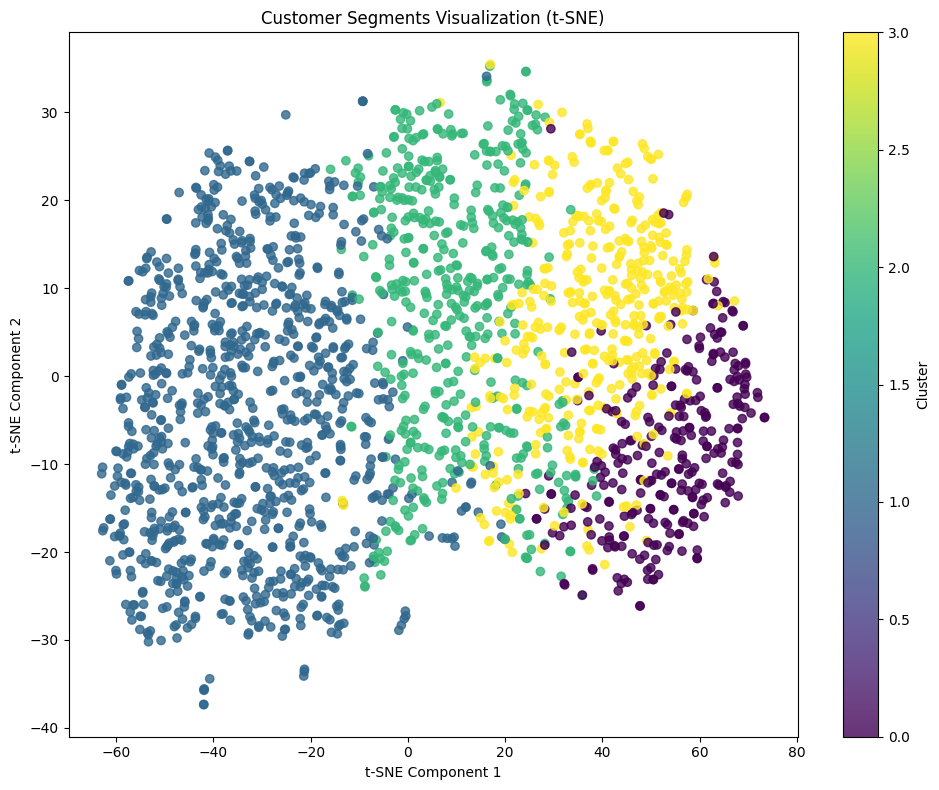

In [18]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis', alpha=0.8)
plt.colorbar(scatter, label='Cluster')
plt.title('Customer Segments Visualization (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.tight_layout()
plt.show()

In [19]:
print("Cluster distribution:")
print(pd.Series(clusters).value_counts())

Cluster distribution:
1    1007
2     504
3     422
0     287
Name: count, dtype: int64
